In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
df.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
765,188,37,786103,24-09-1994,OH,100/300,500,1457.21,0,471785,...,YES,45000,5000,5000,35000,Suburu,Forrestor,2003,N,NaN
762,264,43,516959,01-05-2010,IL,100/300,500,1508.12,6000000,433275,...,NO,60750,13500,6750,40500,Jeep,Wrangler,2015,Y,NaN
68,128,30,500533,11-02-1994,OH,100/300,1000,1061.33,0,478575,...,NO,68530,12460,6230,49840,Audi,A5,1997,N,NaN
175,324,46,648509,06-03-2010,IN,100/300,2000,897.89,6000000,618862,...,YES,79600,15920,15920,47760,Jeep,Wrangler,2011,N,NaN
407,269,45,596298,23-08-1996,IN,500/1000,500,1330.46,0,435552,...,NO,24200,2200,4400,17600,Suburu,Forrestor,2008,N,NaN


In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Checking Null Values

<Axes: >

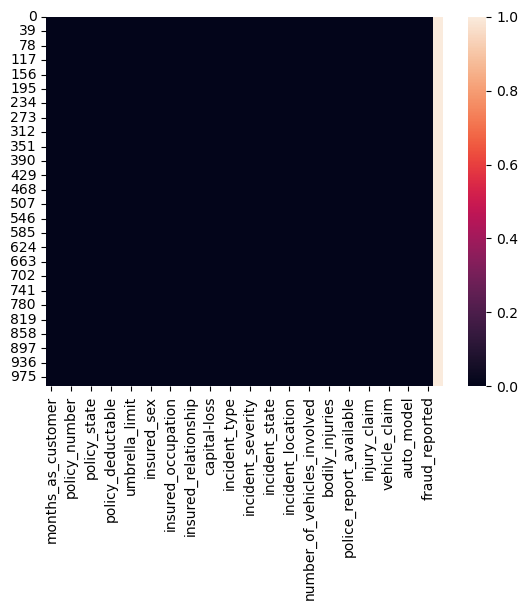

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

The dataset has no null values.

In [12]:
df.iloc[6,:]

months_as_customer                                 137
age                                                 34
policy_number                                   413978
policy_bind_date                            04-06-2000
policy_state                                        IN
policy_csl                                     250/500
policy_deductable                                 1000
policy_annual_premium                          1333.35
umbrella_limit                                       0
insured_zip                                     441716
insured_sex                                       MALE
insured_education_level                            PhD
insured_occupation                      prof-specialty
insured_hobbies                            board-games
insured_relationship                           husband
capital-gains                                        0
capital-loss                                    -77000
incident_date                               13-01-2015
incident_t

Here, we can also see that the data has some values with ? which represent null values. Therefore, we need to treat them.

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


Check correlation of all the columns with each other

<Axes: >

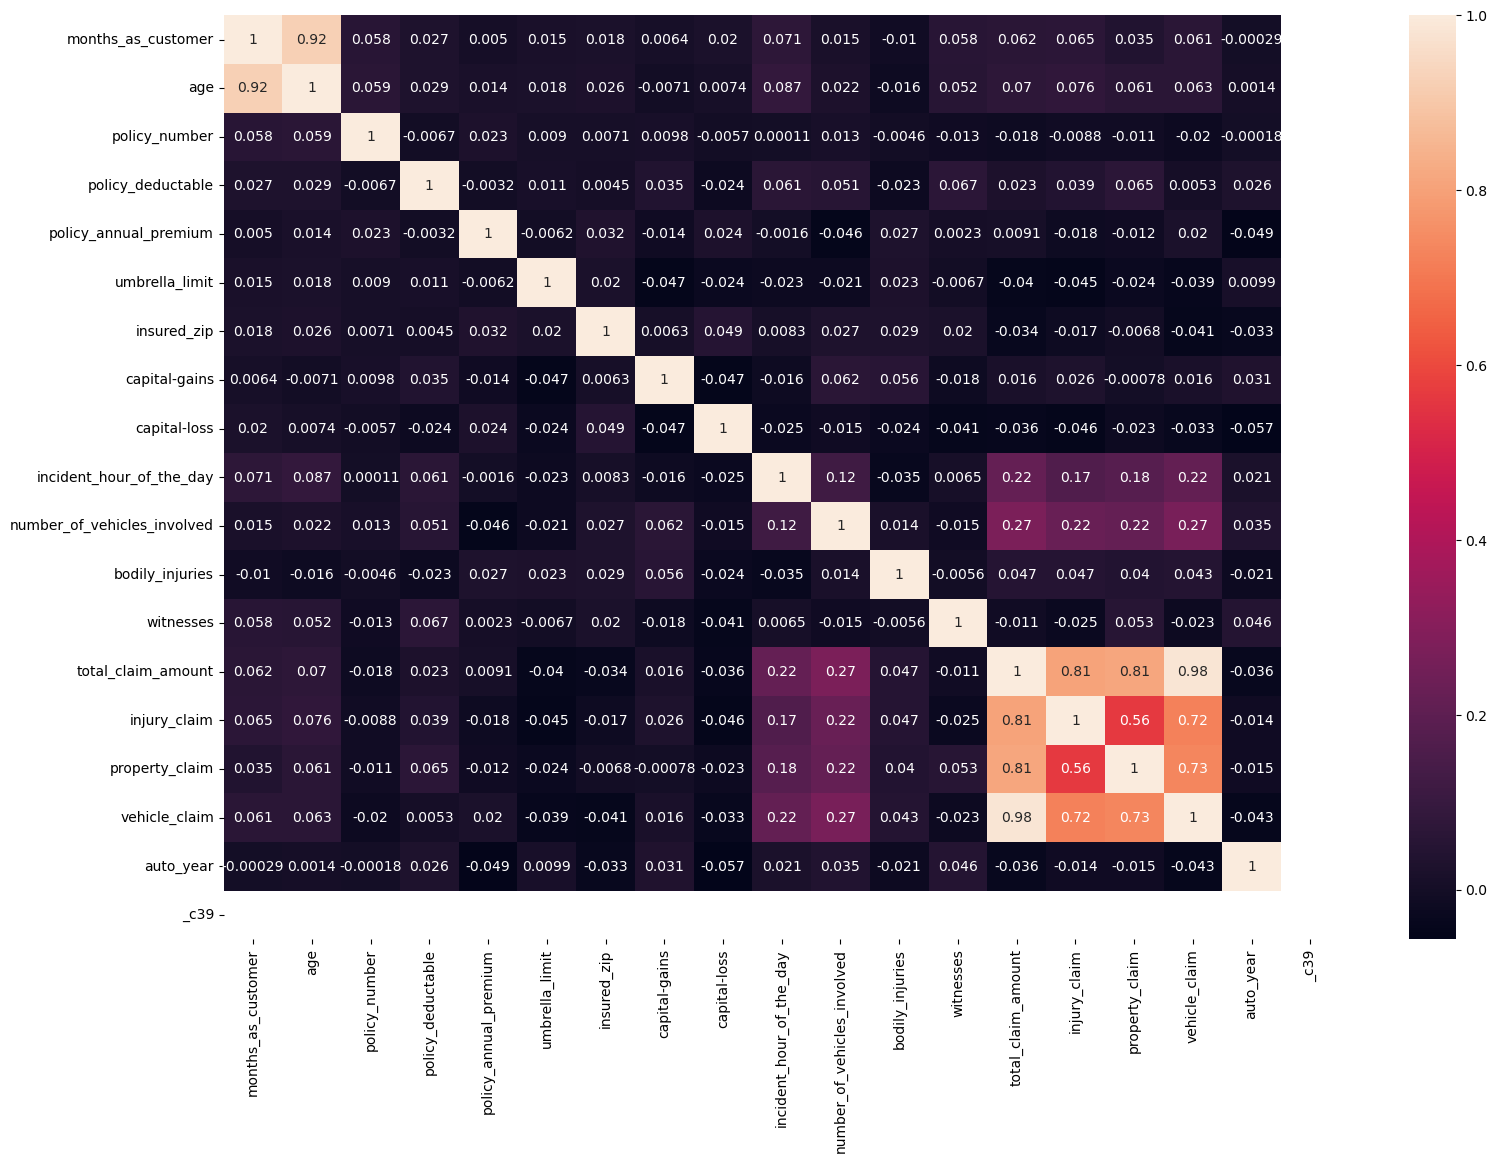

In [14]:
plt.figure(figsize=(18,12))  
sns.heatmap(df.corr(),annot=True)

Data Visualization

In [15]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<Axes: xlabel='fraud_reported', ylabel='count'>

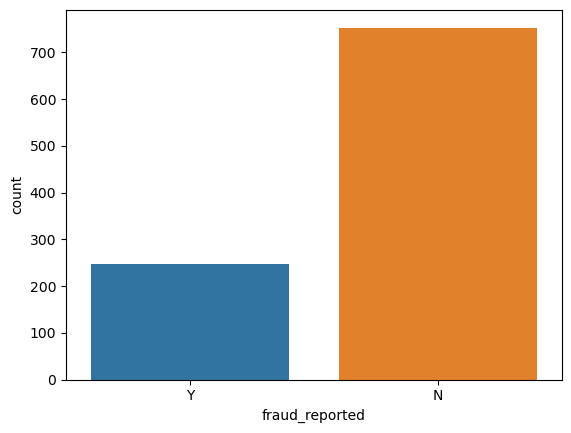

In [16]:
sns.countplot(data=df, x='fraud_reported')

In [17]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<Axes: xlabel='incident_state', ylabel='count'>

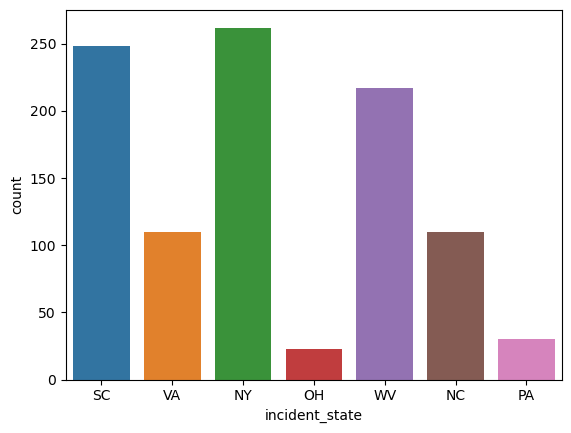

In [18]:
sns.countplot(data=df, x='incident_state')

<Axes: xlabel='incident_state', ylabel='count'>

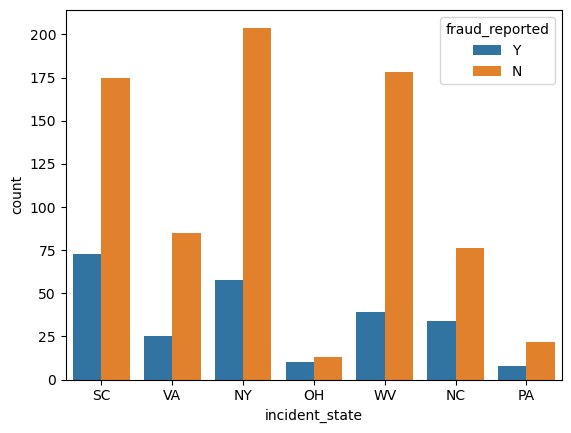

In [19]:
sns.countplot(data=df, x='incident_state', hue='fraud_reported')

<Axes: xlabel='policy_state', ylabel='count'>

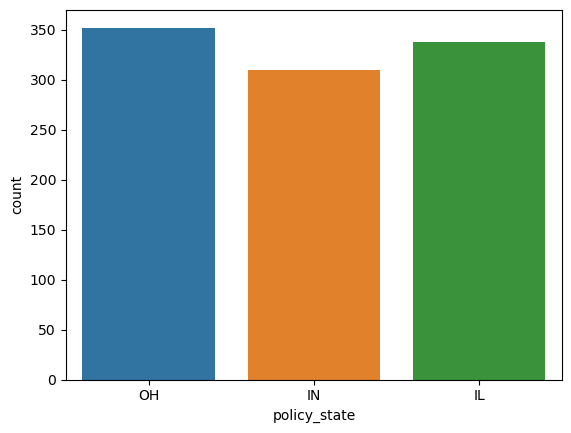

In [20]:
sns.countplot(data=df, x='policy_state')

<Axes: xlabel='policy_state', ylabel='count'>

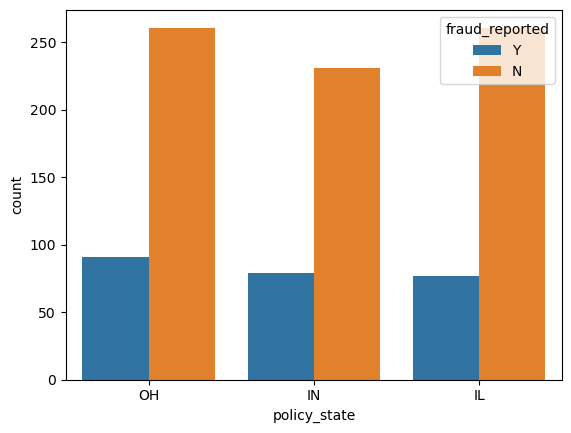

In [21]:
sns.countplot(data=df, x='policy_state', hue='fraud_reported')

<Axes: xlabel='incident_type', ylabel='count'>

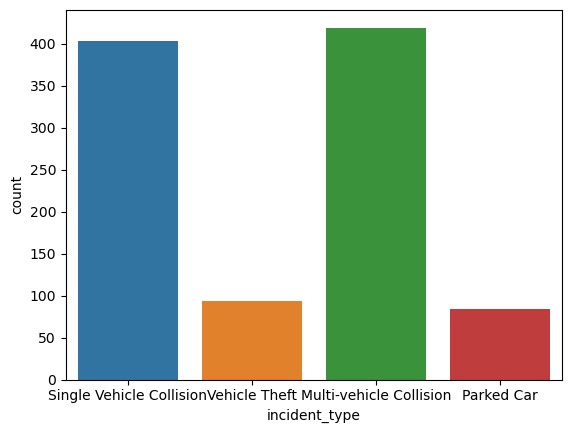

In [22]:
sns.countplot(data=df, x='incident_type')

<Axes: xlabel='incident_type', ylabel='count'>

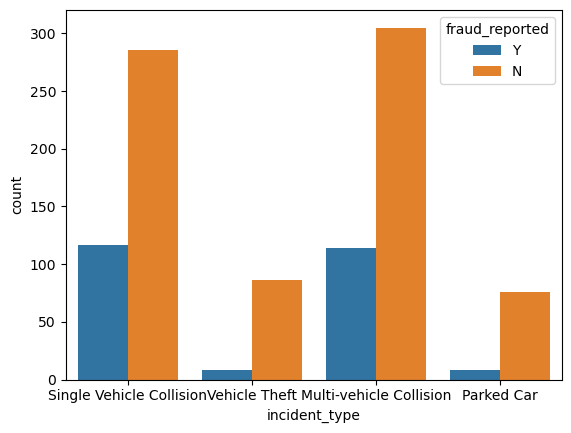

In [23]:
sns.countplot(data=df, x='incident_type', hue='fraud_reported')

<Axes: xlabel='policy_annual_premium', ylabel='count'>

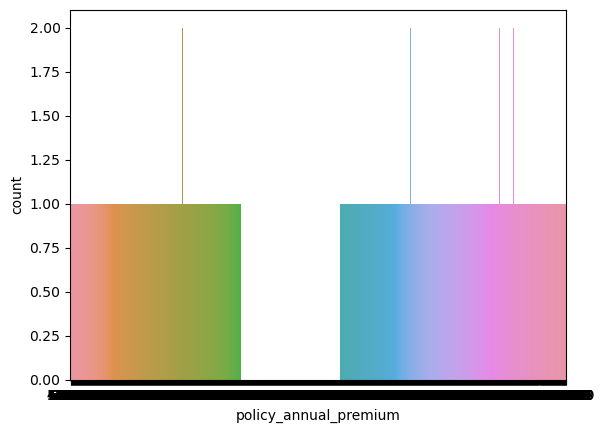

In [24]:
sns.countplot(data=df, x='policy_annual_premium')

<Axes: xlabel='policy_annual_premium', ylabel='count'>

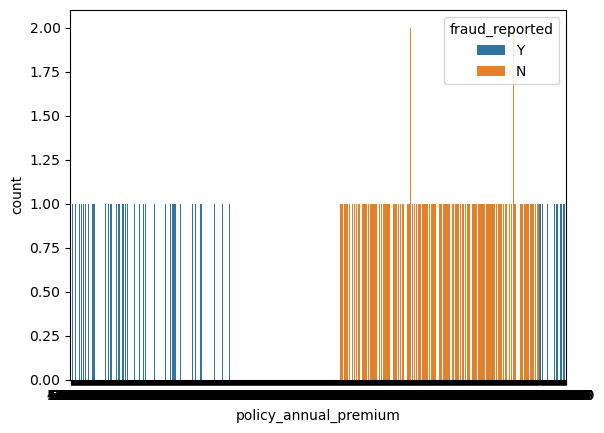

In [25]:
sns.countplot(data=df, x='policy_annual_premium', hue='fraud_reported')

<Axes: xlabel='insured_sex', ylabel='count'>

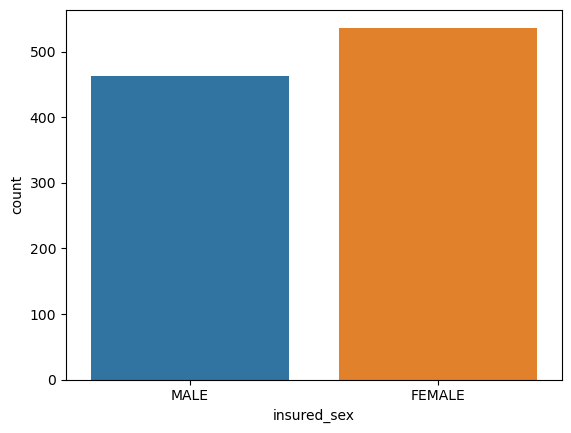

In [26]:
sns.countplot(data=df, x='insured_sex')

<Axes: xlabel='insured_sex', ylabel='count'>

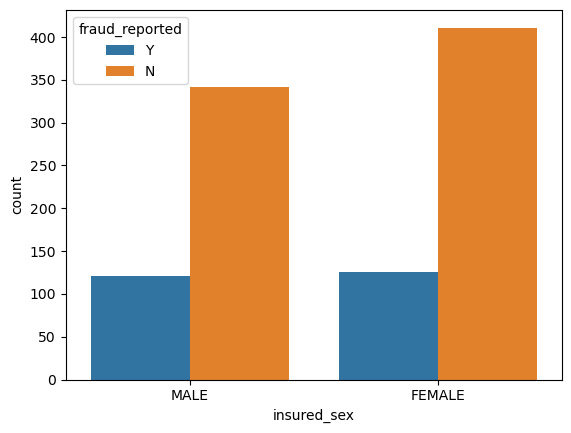

In [27]:
sns.countplot(data=df, x='insured_sex', hue='fraud_reported')

<Axes: xlabel='insured_relationship', ylabel='count'>

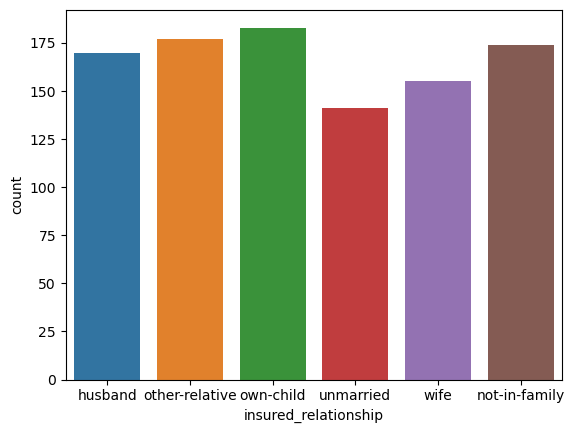

In [28]:
sns.countplot(data=df, x='insured_relationship')

<Axes: xlabel='insured_relationship', ylabel='count'>

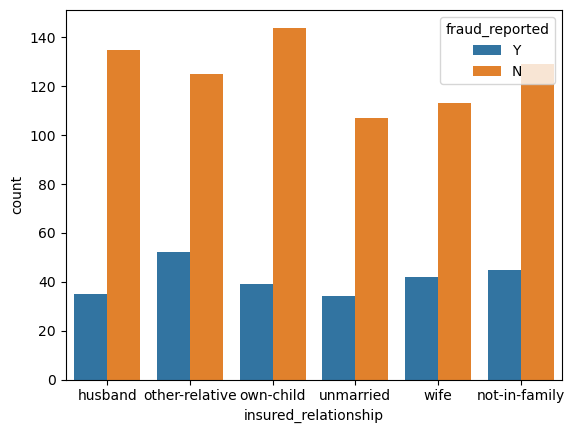

In [29]:
sns.countplot(data=df, x='insured_relationship', hue='fraud_reported')

<Axes: xlabel='authorities_contacted', ylabel='count'>

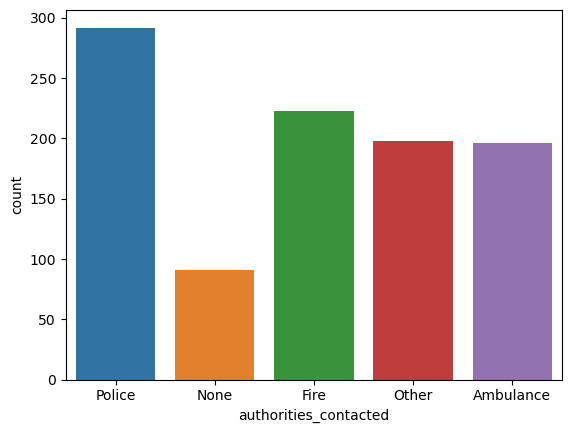

In [30]:
sns.countplot(data=df, x='authorities_contacted')

<Axes: xlabel='authorities_contacted', ylabel='count'>

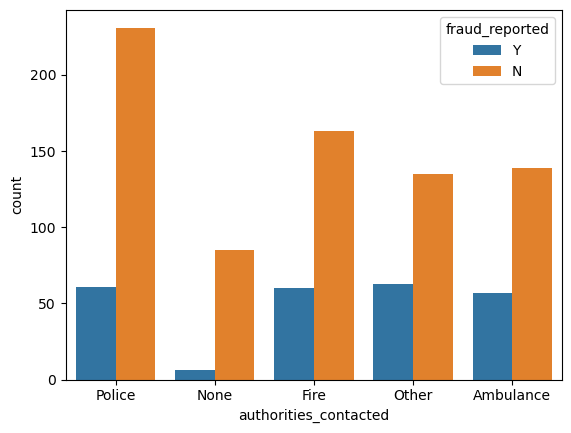

In [31]:
sns.countplot(data=df, x='authorities_contacted', hue='fraud_reported')

<Axes: xlabel='auto_make', ylabel='count'>

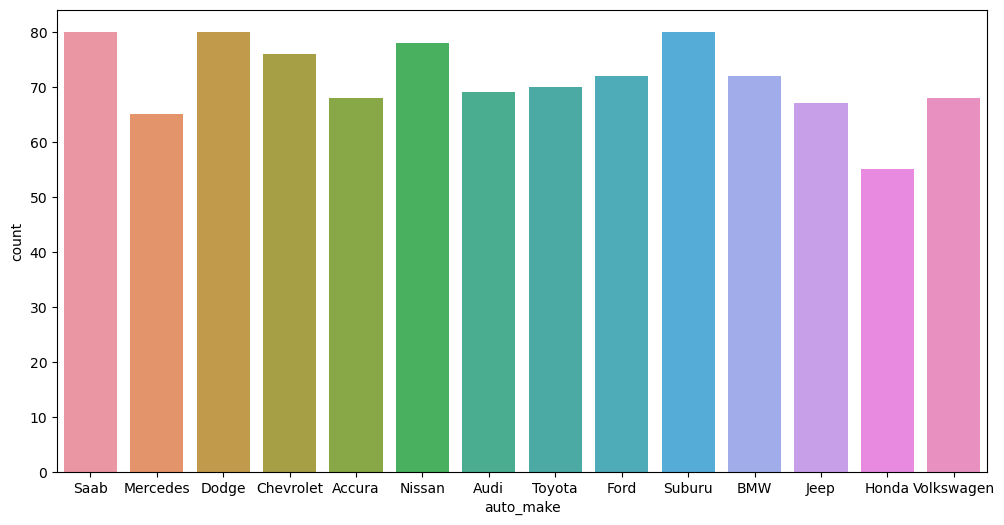

In [32]:
plt.figure(figsize=[12,6])
sns.countplot(data=df, x='auto_make')

<Axes: xlabel='incident_severity', ylabel='count'>

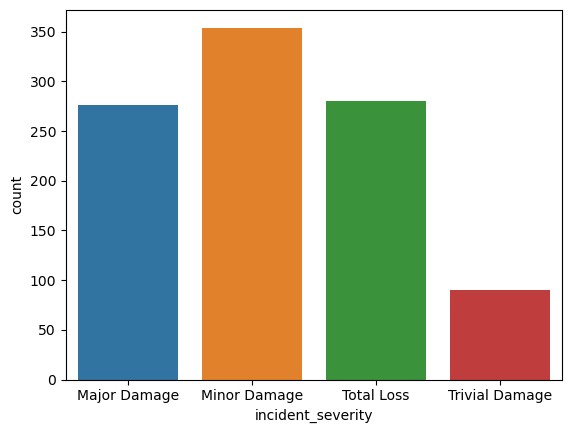

In [33]:
sns.countplot(data=df, x='incident_severity')

<Axes: xlabel='incident_severity', ylabel='count'>

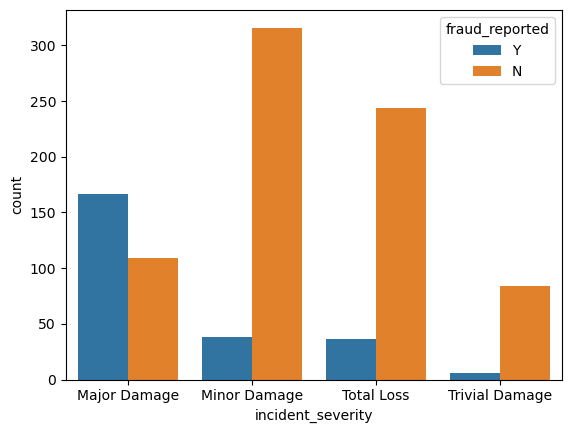

In [34]:
sns.countplot(data=df, x='incident_severity', hue='fraud_reported')

<Axes: xlabel='insured_hobbies', ylabel='count'>

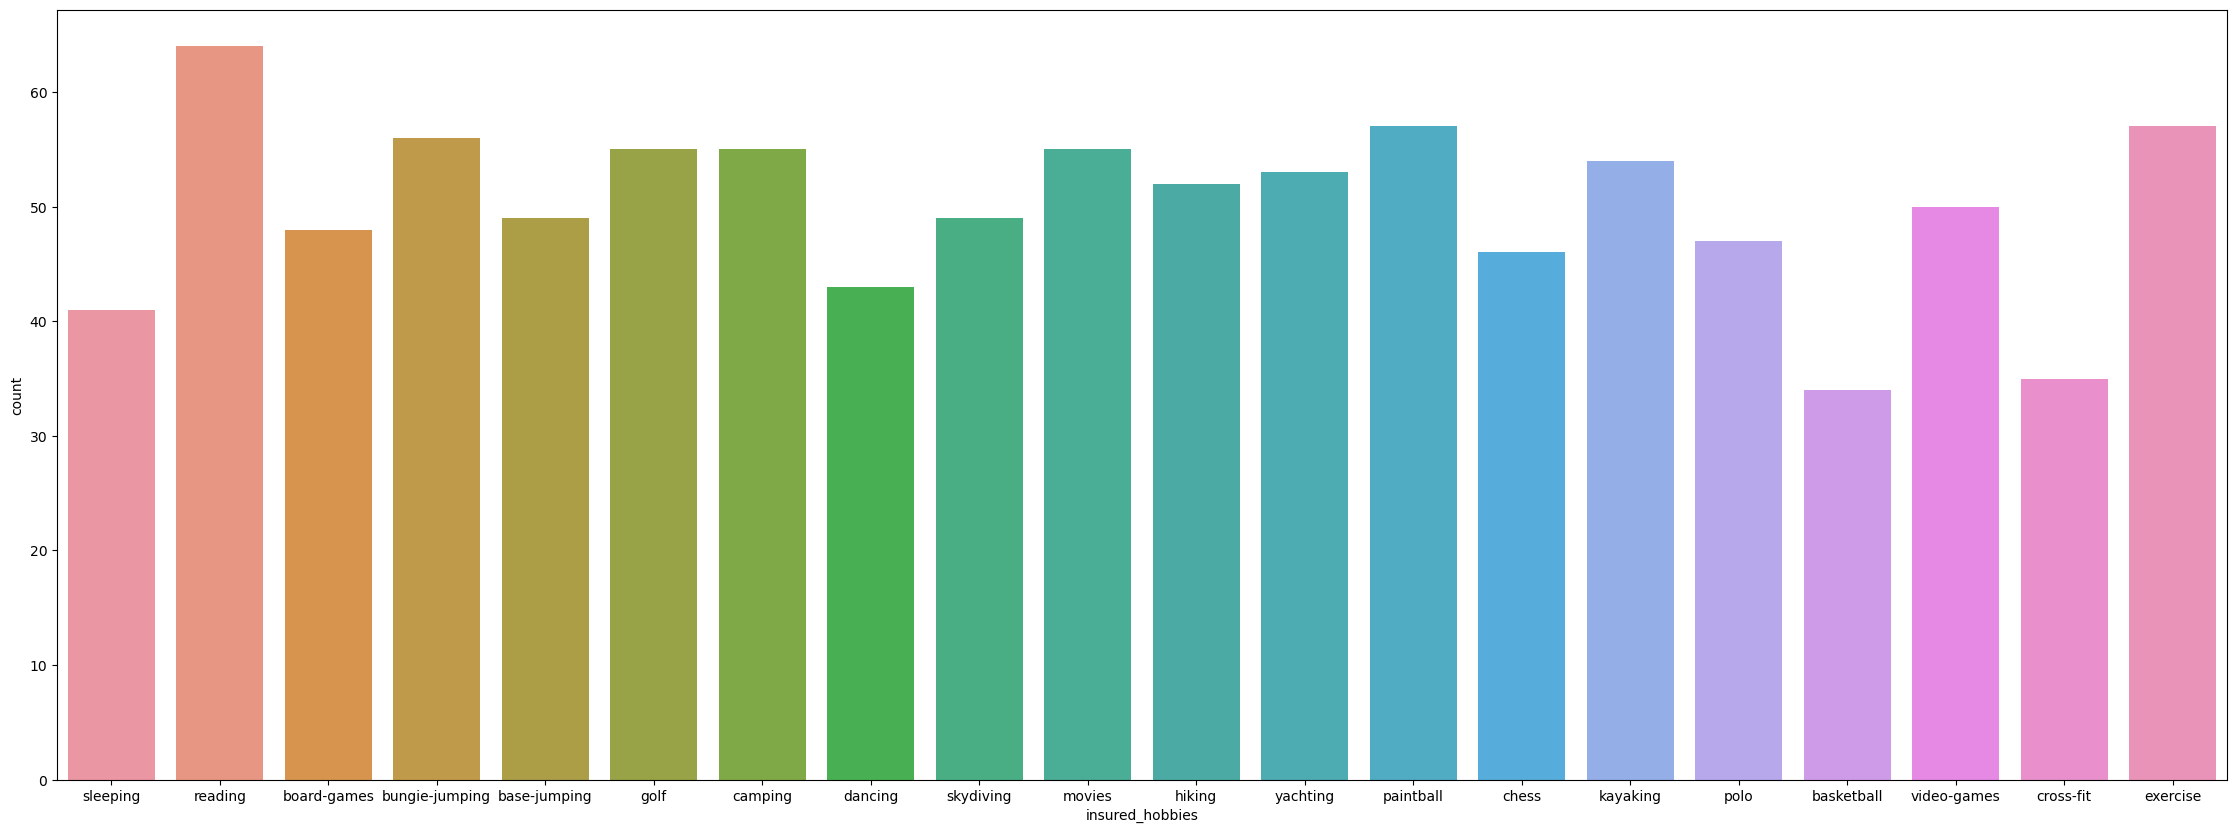

In [35]:
plt.figure(figsize=[28,10])
sns.countplot(data=df, x='insured_hobbies')

<Axes: xlabel='insured_hobbies', ylabel='count'>

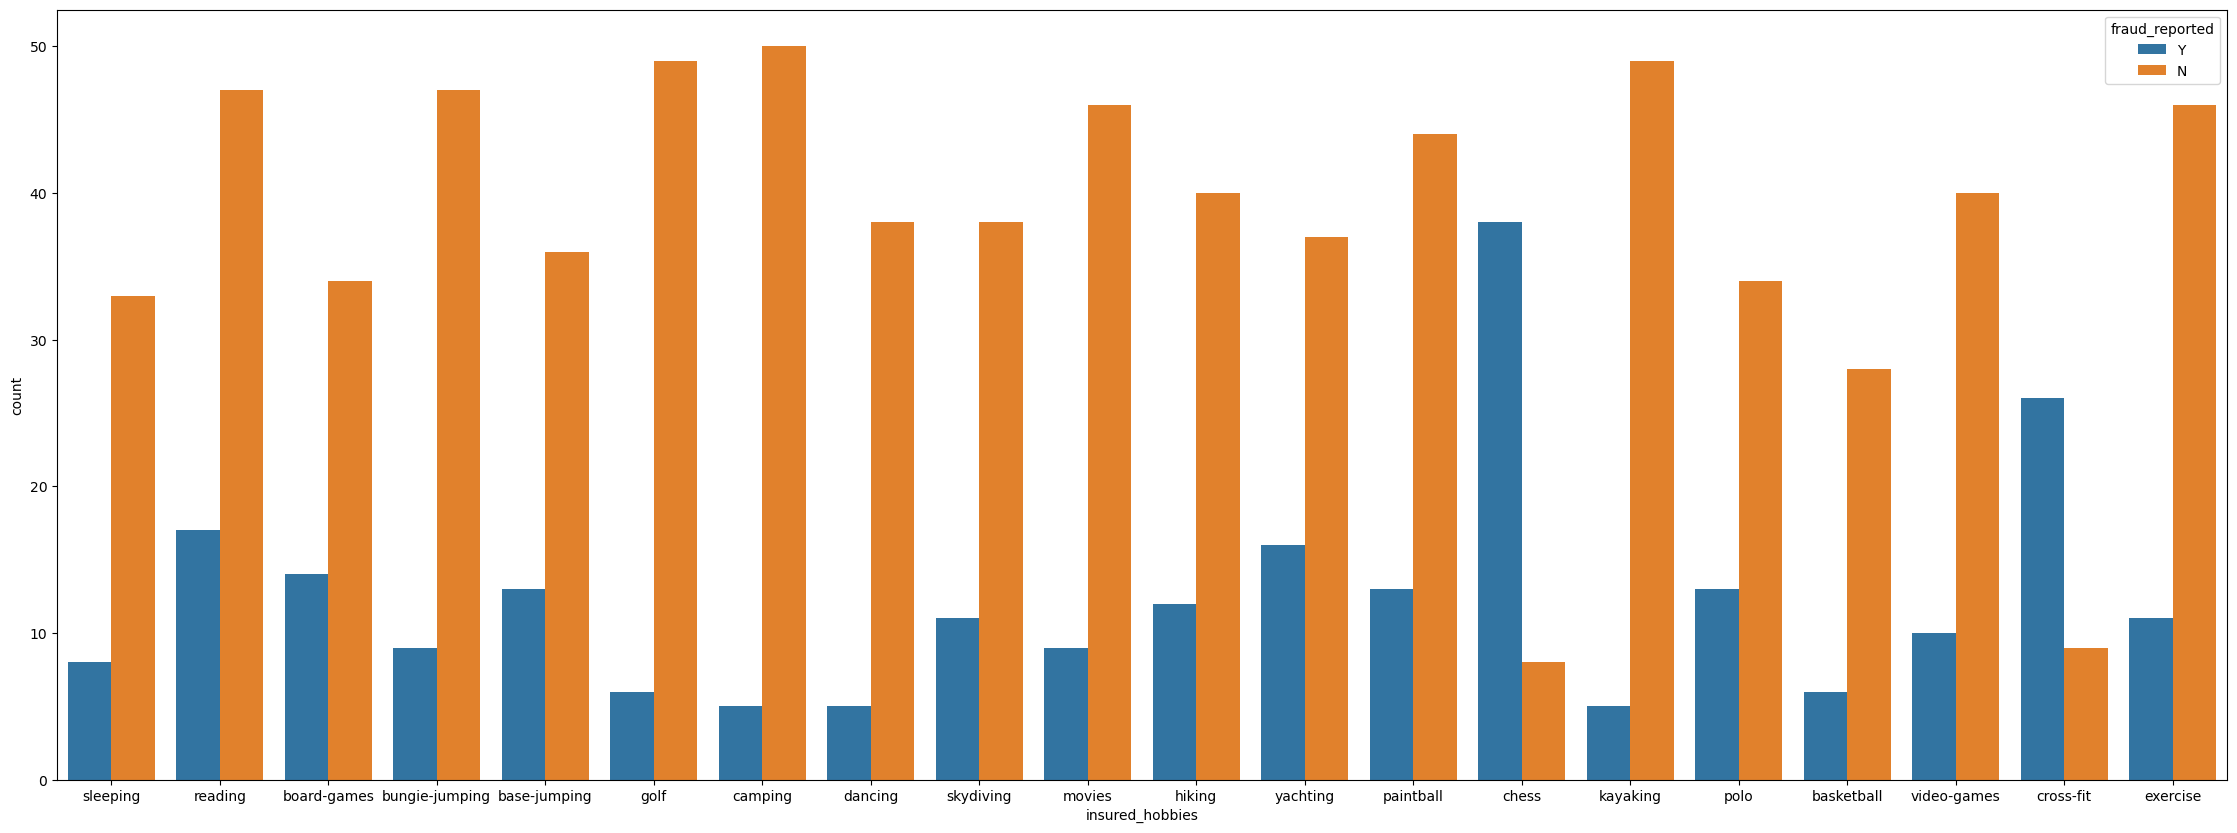

In [36]:
plt.figure(figsize=[28,10])
sns.countplot(data=df, x='insured_hobbies', hue='fraud_reported')

<Axes: xlabel='insured_occupation', ylabel='count'>

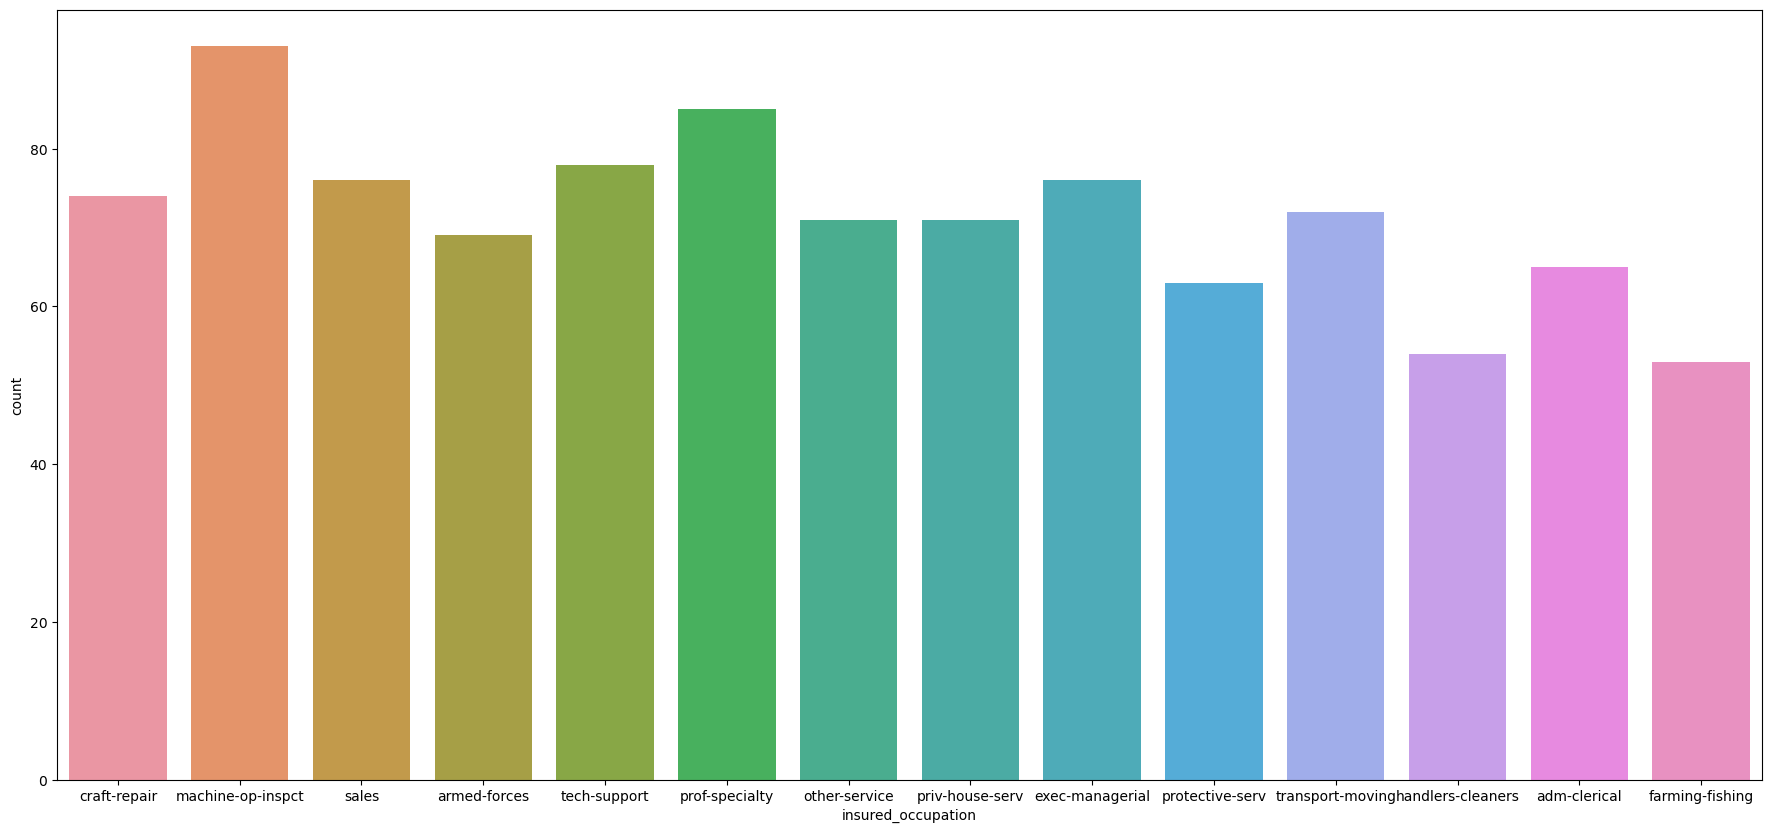

In [37]:
plt.figure(figsize=[22,10])
sns.countplot(data=df, x='insured_occupation')

<Axes: xlabel='insured_occupation', ylabel='count'>

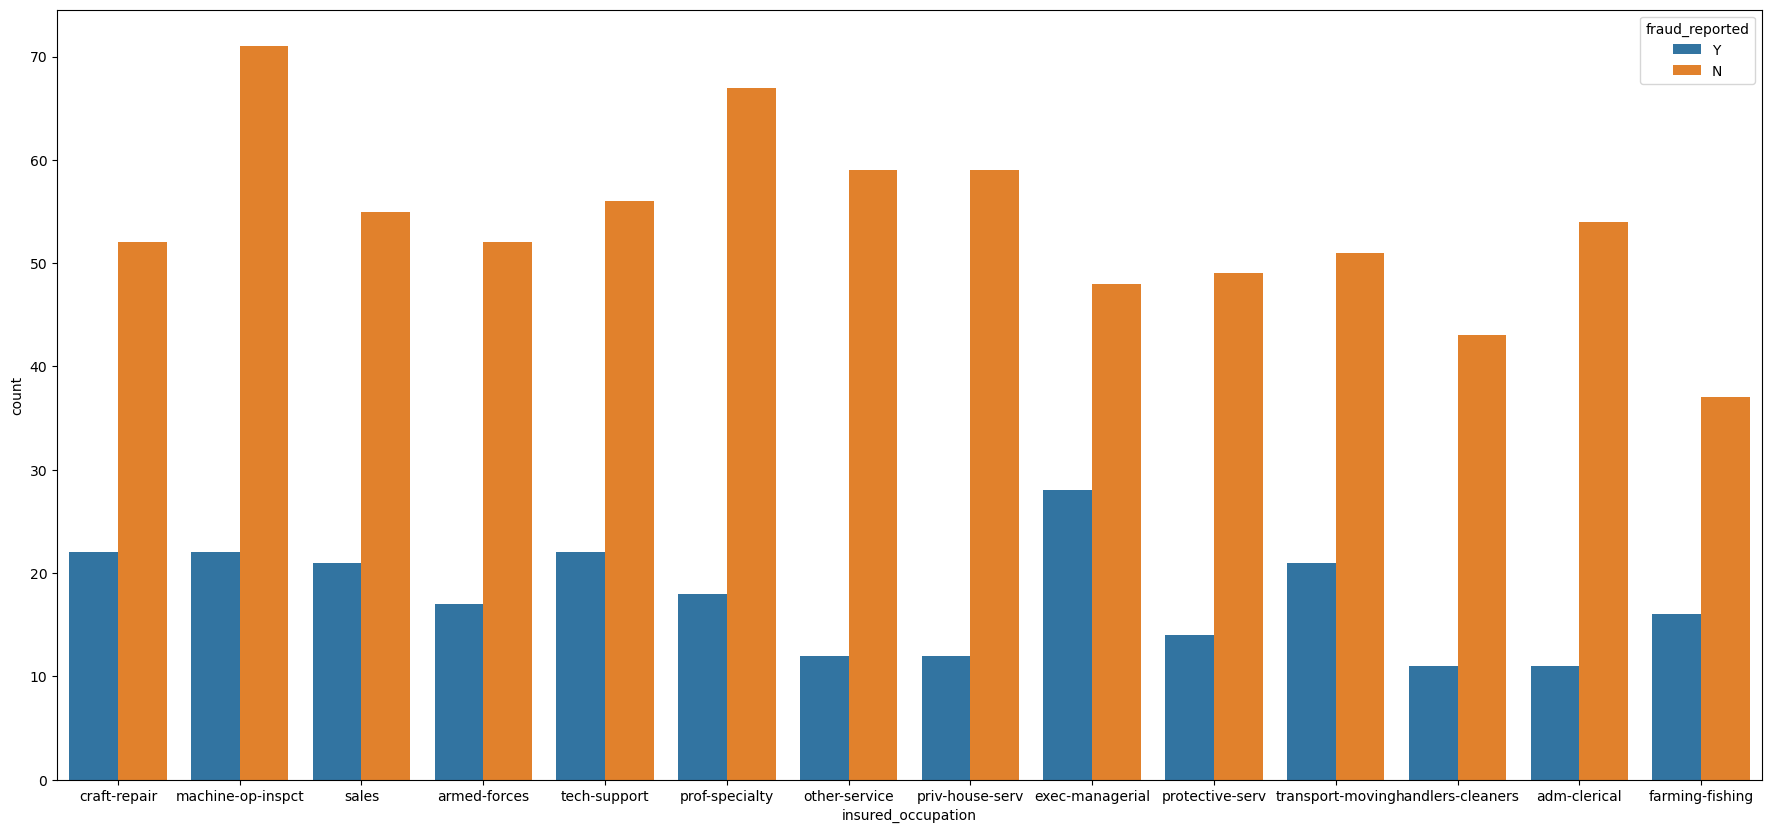

In [38]:
plt.figure(figsize=[22,10])
sns.countplot(data=df, x='insured_occupation', hue='fraud_reported')

In [39]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N',  value=0, inplace=True)

In [40]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,1,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,1,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,0,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,0,NaN


In [41]:
to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',  
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']  
  
df.drop(to_drop, axis = 1, inplace=True) 

In [42]:
df.shape

(1000, 27)

Checking Skewness

array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_deductable'}>,
        <Axes: title={'center': 'policy_annual_premium'}>],
       [<Axes: title={'center': 'umbrella_limit'}>,
        <Axes: title={'center': 'capital-gains'}>,
        <Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'incident_hour_of_the_day'}>],
       [<Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'bodily_injuries'}>,
        <Axes: title={'center': 'witnesses'}>,
        <Axes: title={'center': 'total_claim_amount'}>],
       [<Axes: title={'center': 'injury_claim'}>,
        <Axes: title={'center': 'property_claim'}>,
        <Axes: title={'center': 'vehicle_claim'}>,
        <Axes: title={'center': 'fraud_reported'}>]], dtype=object)

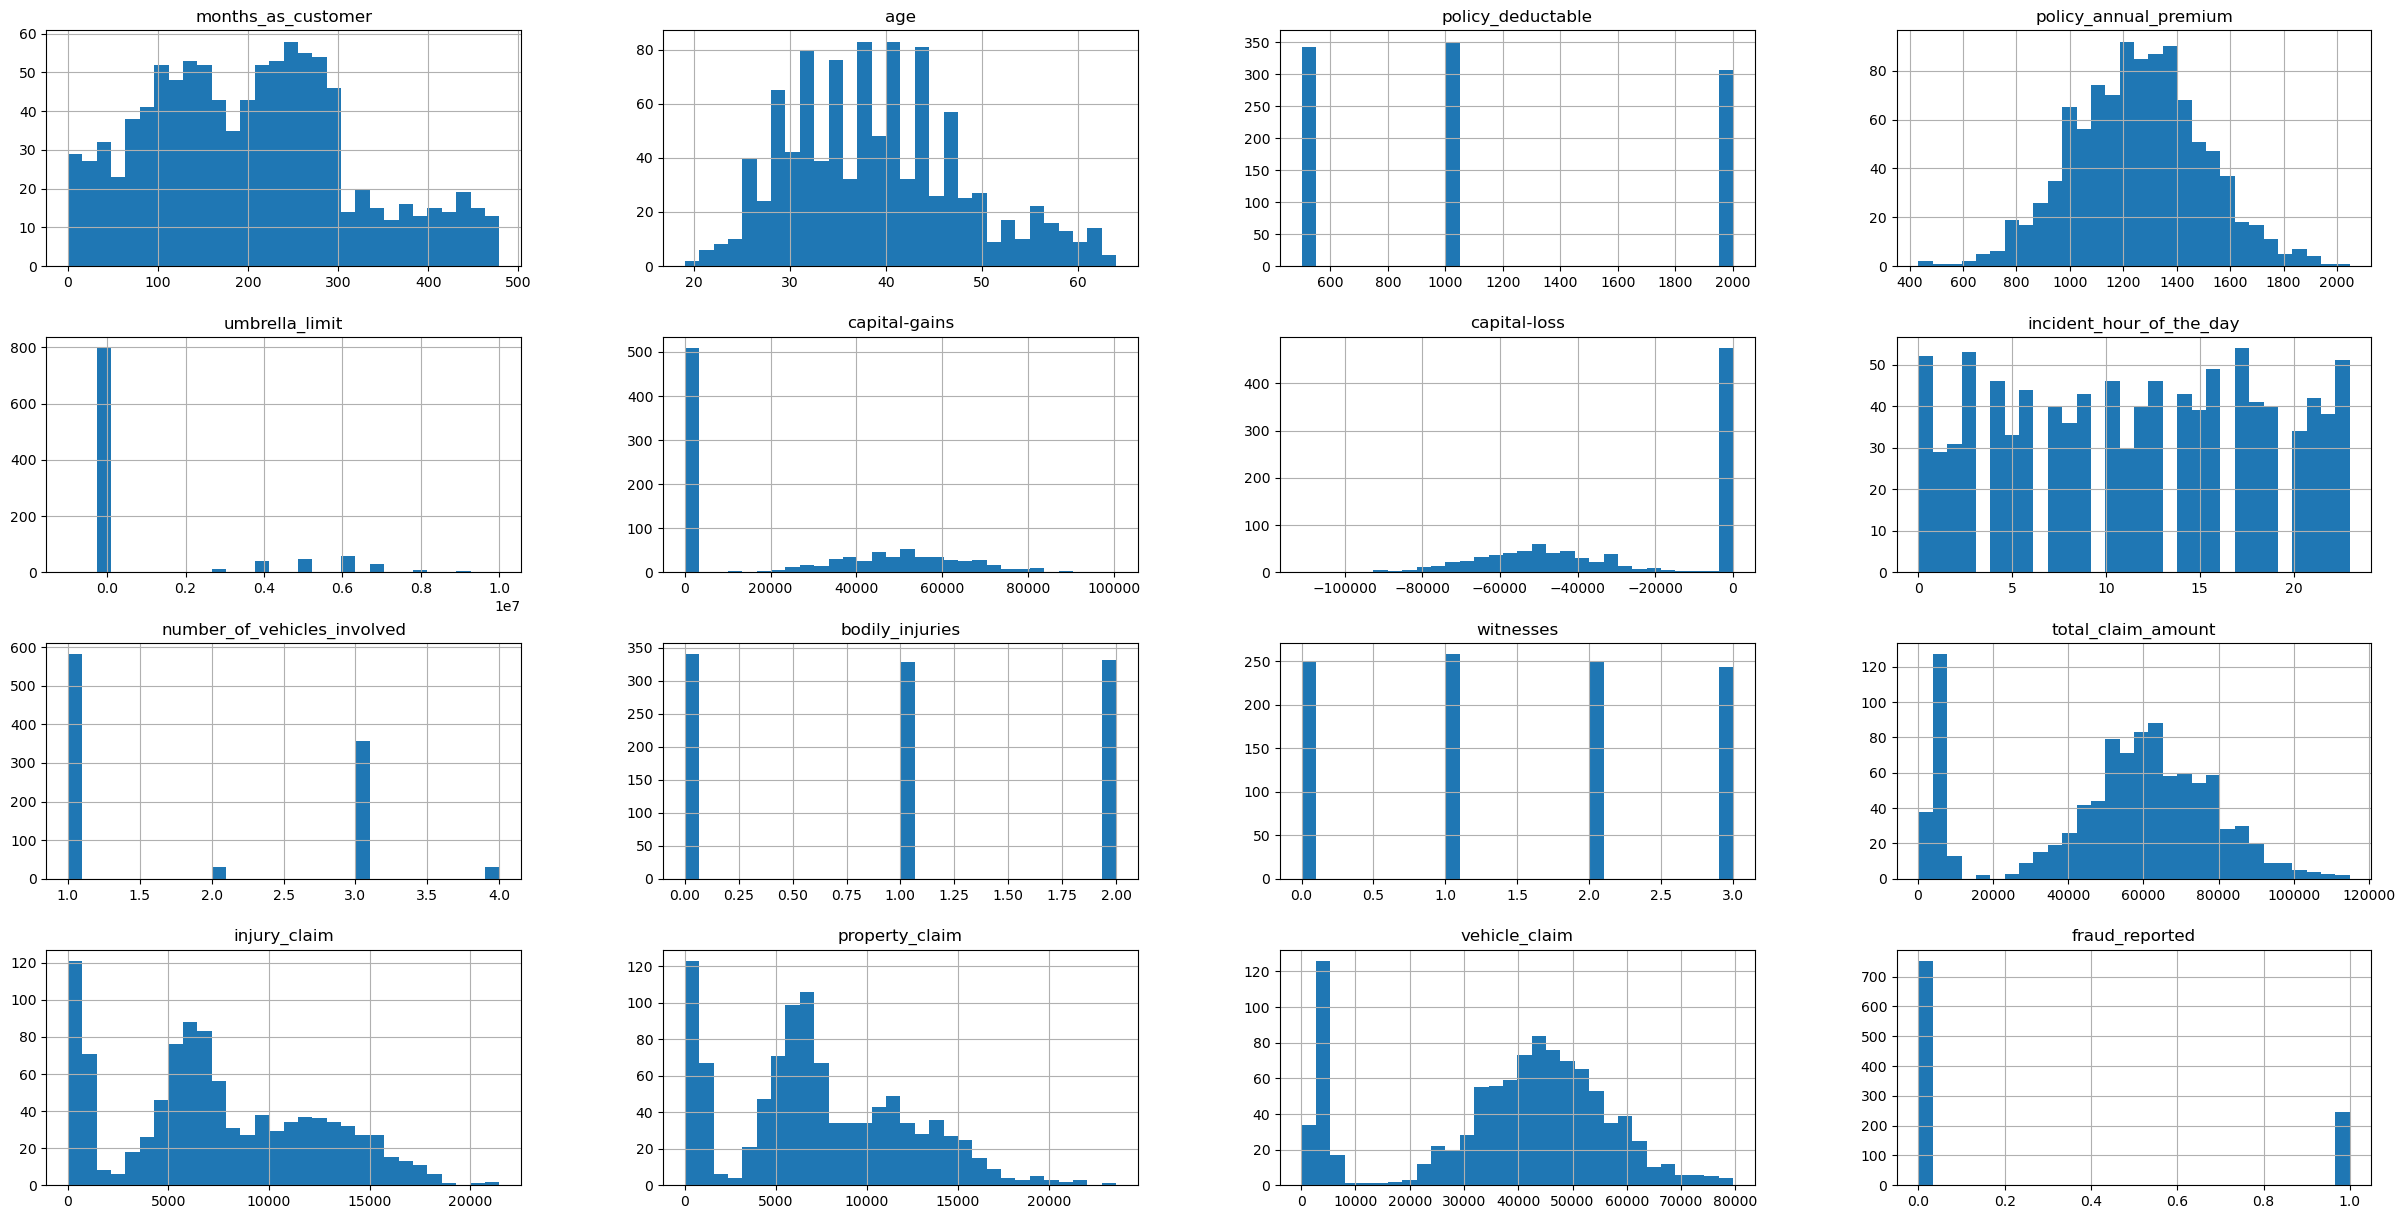

In [43]:
df.hist(bins=30,figsize=(30,15))

In [44]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
dtype: float64

The skewness in dataset is balanced.

Checking Outliers

months_as_customer                Axes(0.125,0.712609;0.133621x0.167391)
age                            Axes(0.285345,0.712609;0.133621x0.167391)
policy_deductable               Axes(0.44569,0.712609;0.133621x0.167391)
policy_annual_premium          Axes(0.606034,0.712609;0.133621x0.167391)
umbrella_limit                 Axes(0.766379,0.712609;0.133621x0.167391)
capital-gains                     Axes(0.125,0.511739;0.133621x0.167391)
capital-loss                   Axes(0.285345,0.511739;0.133621x0.167391)
incident_hour_of_the_day        Axes(0.44569,0.511739;0.133621x0.167391)
number_of_vehicles_involved    Axes(0.606034,0.511739;0.133621x0.167391)
bodily_injuries                Axes(0.766379,0.511739;0.133621x0.167391)
witnesses                          Axes(0.125,0.31087;0.133621x0.167391)
total_claim_amount              Axes(0.285345,0.31087;0.133621x0.167391)
injury_claim                     Axes(0.44569,0.31087;0.133621x0.167391)
property_claim                  Axes(0.606034,0.310

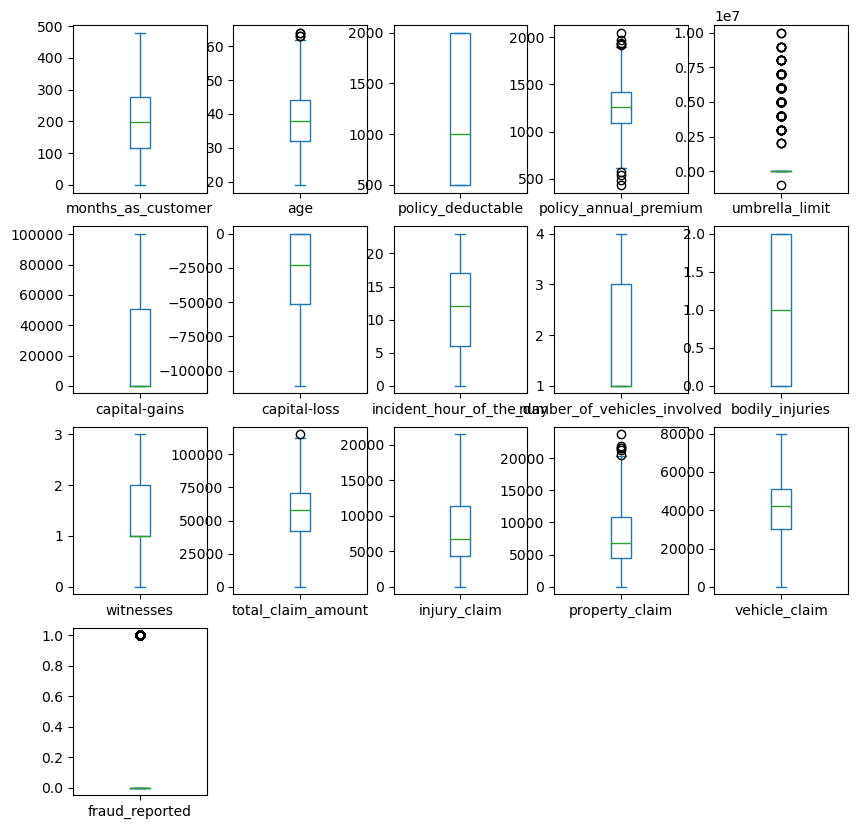

In [45]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(10,10))

There are not much outliers in the dataset that can effect the model.

Checking missing values

In [46]:
var={}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "?")
        var[i] = j
var = pd.DataFrame.from_dict(var, orient='index')
print(var)

                           0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_relationship       0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
property_damage          360
police_report_available  343


collision_type, property_damage, police_report_available contain many missing values in form of '?. 

In [47]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [48]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [49]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [50]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'fraud_reported'],
      dtype='object')

In [51]:
df.select_dtypes(include=['object']).columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available'],
      dtype='object')

Using LabelEncoder for converting Categorical datatype columns to Numerical datatype

In [52]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [53]:
df['policy_csl'] = encoder.fit_transform(df['policy_csl'])
df['insured_sex'] = encoder.fit_transform(df['insured_sex'])
df['insured_education_level'] = encoder.fit_transform(df['insured_education_level'])
df['insured_occupation'] = encoder.fit_transform(df['insured_occupation'])
df['insured_relationship'] = encoder.fit_transform(df['insured_relationship'])
df['incident_type'] = encoder.fit_transform(df['incident_type'])
df['collision_type'] = encoder.fit_transform(df['collision_type'])
df['incident_severity'] = encoder.fit_transform(df['incident_severity'])
df['authorities_contacted'] = encoder.fit_transform(df['authorities_contacted'])
df['property_damage'] = encoder.fit_transform(df['property_damage'])
df['police_report_available'] = encoder.fit_transform(df['police_report_available'])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   int32  
 7   insured_education_level      1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_relationship         1000 non-null   int32  
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   int32  
 13  collision_type     

In [55]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1,1000,1406.91,0,1,4,2,0,...,1,2,1,2,2,71610,6510,13020,52080,1
1,228,42,1,2000,1197.22,5000000,1,4,6,2,...,1,0,0,0,0,5070,780,780,3510,1
2,134,29,0,2000,1413.14,5000000,0,6,11,3,...,3,1,2,3,1,34650,7700,3850,23100,0
3,256,41,1,2000,1415.74,6000000,0,6,1,4,...,1,0,1,2,1,63400,6340,6340,50720,1
4,228,44,2,1000,1583.91,6000000,1,0,11,4,...,1,1,0,1,1,6500,1300,650,4550,0


Implementing Machine Learning thru Logistic Regression

In [56]:
x=df.iloc[:,0:25]
y=df.iloc[:,26]

In [57]:
x

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim
0,328,48,1,1000,1406.91,0,1,4,2,0,...,4,5,1,2,1,2,2,71610,6510,13020
1,228,42,1,2000,1197.22,5000000,1,4,6,2,...,4,8,1,0,0,0,0,5070,780,780
2,134,29,0,2000,1413.14,5000000,0,6,11,3,...,4,7,3,1,2,3,1,34650,7700,3850
3,256,41,1,2000,1415.74,6000000,0,6,1,4,...,4,5,1,0,1,2,1,63400,6340,6340
4,228,44,2,1000,1583.91,6000000,1,0,11,4,...,2,20,1,1,0,1,1,6500,1300,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,4,...,1,20,1,2,0,1,0,87200,17440,8720
996,285,41,0,1000,1436.79,0,0,6,9,5,...,1,23,1,2,2,3,0,108480,18080,18080
997,130,34,1,500,1383.49,3000000,0,5,1,2,...,4,4,3,0,2,3,2,67500,7500,7500
998,458,62,2,2000,1356.92,5000000,1,0,5,5,...,3,2,1,0,0,1,2,46980,5220,5220


In [58]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

Creating train test split

Training phase will get 70% of distribution and testing phase will get 30% of distribution.

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 25)
(300, 25)
(700,)
(300,)


In [60]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [61]:
LRpred=LR.predict(x_test)
LRpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [62]:
accuracy_score(y_test,LRpred)

0.7333333333333333

In [63]:
confusion_matrix(y_test,LRpred)

array([[219,   1],
       [ 79,   1]], dtype=int64)

In [64]:
print(classification_report(y_test,LRpred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       220
           1       0.50      0.01      0.02        80

    accuracy                           0.73       300
   macro avg       0.62      0.50      0.43       300
weighted avg       0.67      0.73      0.63       300



The accuracy score using Logistic Regression is 73.3%

Using Random Forest Classifier

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 25)
(300, 25)
(700,)
(300,)


Training phase got 70% of distribution and testing phase got 30% of distribution

In [66]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
RFCpred=RFC.predict(x_test)
RFCpred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], d

In [68]:
accuracy_score(y_test,RFCpred)

0.7366666666666667

The accuracy score using Random Forest CLassifier is 73.6%

# Saving the model

In [69]:
import joblib
joblib.dump(RFC,'Insurance_Claim_Fraud_Detection_Final.obj')

['Insurance_Claim_Fraud_Detection_Final.obj']